[[ 0.00000e+00 -1.00000e-05 -1.00000e-05]
 [ 6.26000e-02 -1.00000e-05 -1.00000e-05]
 [ 1.25200e-01 -1.00000e-05 -2.00000e-05]
 [ 1.87800e-01 -1.00000e-05 -2.00000e-05]
 [ 2.50400e-01 -2.00000e-05 -2.00000e-05]
 [ 3.13000e-01 -2.00000e-05 -2.00000e-05]
 [ 3.75600e-01 -2.00000e-05 -2.00000e-05]
 [ 4.38200e-01 -2.00000e-05 -2.00000e-05]
 [ 5.00900e-01 -2.00000e-05 -3.00000e-05]
 [ 5.63500e-01 -3.00000e-05 -3.00000e-05]
 [ 6.26100e-01 -3.00000e-05 -3.00000e-05]
 [ 6.88700e-01 -3.00000e-05 -3.00000e-05]
 [ 7.51300e-01 -3.00000e-05 -3.00000e-05]
 [ 8.13900e-01 -3.00000e-05 -3.00000e-05]
 [ 8.76500e-01 -3.00000e-05 -4.00000e-05]
 [ 9.39100e-01 -4.00000e-05 -4.00000e-05]
 [ 1.00170e+00 -4.00000e-05 -4.00000e-05]
 [ 1.06430e+00 -4.00000e-05 -4.00000e-05]
 [ 1.12690e+00 -4.00000e-05 -5.00000e-05]
 [ 1.18950e+00 -4.00000e-05 -5.00000e-05]
 [ 1.25210e+00 -4.00000e-05 -5.00000e-05]
 [ 1.31470e+00 -4.00000e-05 -5.00000e-05]
 [ 1.37730e+00 -5.00000e-05 -5.00000e-05]
 [ 1.43990e+00 -5.00000e-05 -5.000

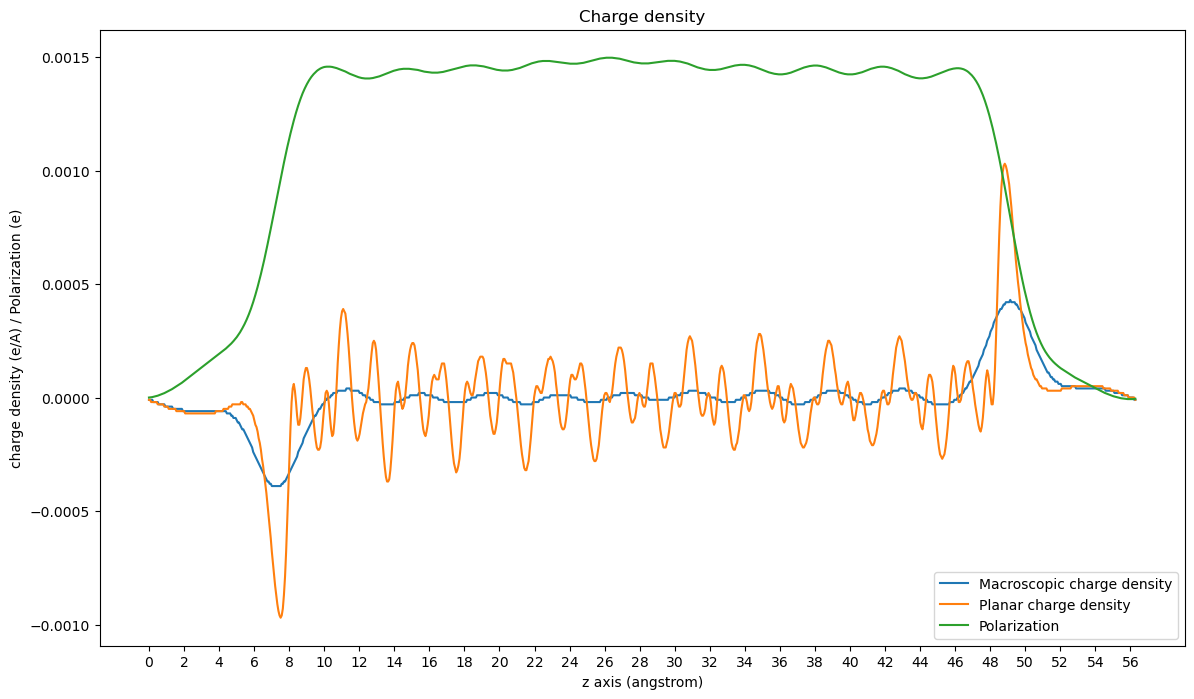

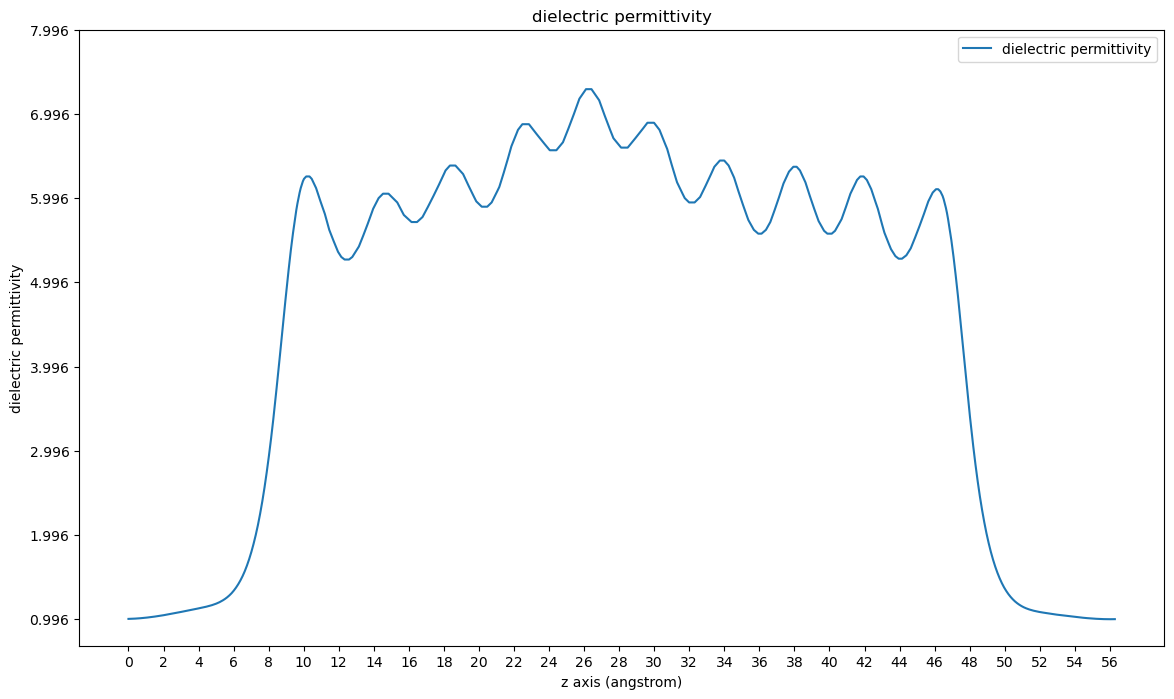

In [33]:
######################
# Still under construction...
# For the mathematical detail, see Feliciano (2005), PRB 93, 195428 (2016) and Ramprasad (2006).
# ! This is the final version of the code so far.
# TODO: How the fuck they calculate the planar charge density in the VASPKIT software.
######################
import matplotlib.pyplot as plt
import numpy as np

ind_chg_file_path = "./files/MACROSCOPIC_AVERAGE.dat"
E_ext = 0.01
Planar_area = 3.953265*3.970536
long_len = 56.35 # angstrom

def macro_charge(dat_file_path): # Read MACROSCOPIC_AVERAGE.dat file
    with open(dat_file_path, 'r') as file:
        gnuplot_commands = file.readlines()
    data = []
    for line in gnuplot_commands:
        if line.startswith('#') or line.strip() == '':
            continue    # skip comments and empty lines.
        x, y, z = map(float, line.split())      # Three columns of data to read. You can always expand to a bigger dimension.
        data.append((x, y, z))
    return np.array(data)

def polarization(array_data):
    n = len(array_data)
    polar = [0] # 
    for j in range(1,n):
        dp = -((array_data[j,0] - array_data[j-1,0]) * array_data[j,1]) # dp = dz * rho(z) (density)
        polar.append(dp+polar[j-1])
    return polar

def permittivity(list_data):
    eps0 = 0.005526349406   # e/(V*Ang), make everything to Si units not Hartree sunits...
    permitt = (2*E_ext)/(2*E_ext - (np.array(list_data)/(Planar_area)*(1/eps0)))   # The electric field is 0.05 eV/Ang
    return permitt

induced_charge = macro_charge(ind_chg_file_path)    # data in array, easy to manipulate now.
induced_polarization = polarization(induced_charge)
induced_permittivity = permittivity(induced_polarization)

print(induced_charge)

# Plotting using Matplotlib.
plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], induced_charge[:, 1], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], induced_polarization, label='Polarization')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('charge density (e/A) / Polarization (e)')
plt.title('Charge density')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 1], label='Macroscopic charge density')
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], induced_permittivity, label='dielectric permittivity')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.yticks(np.arange(min(induced_permittivity), max(induced_permittivity)+1, 1.0))  # Add yticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('dielectric permittivity')
plt.title('dielectric permittivity')
plt.legend()
plt.show()

The length for averaging is 1.9406 angstrom


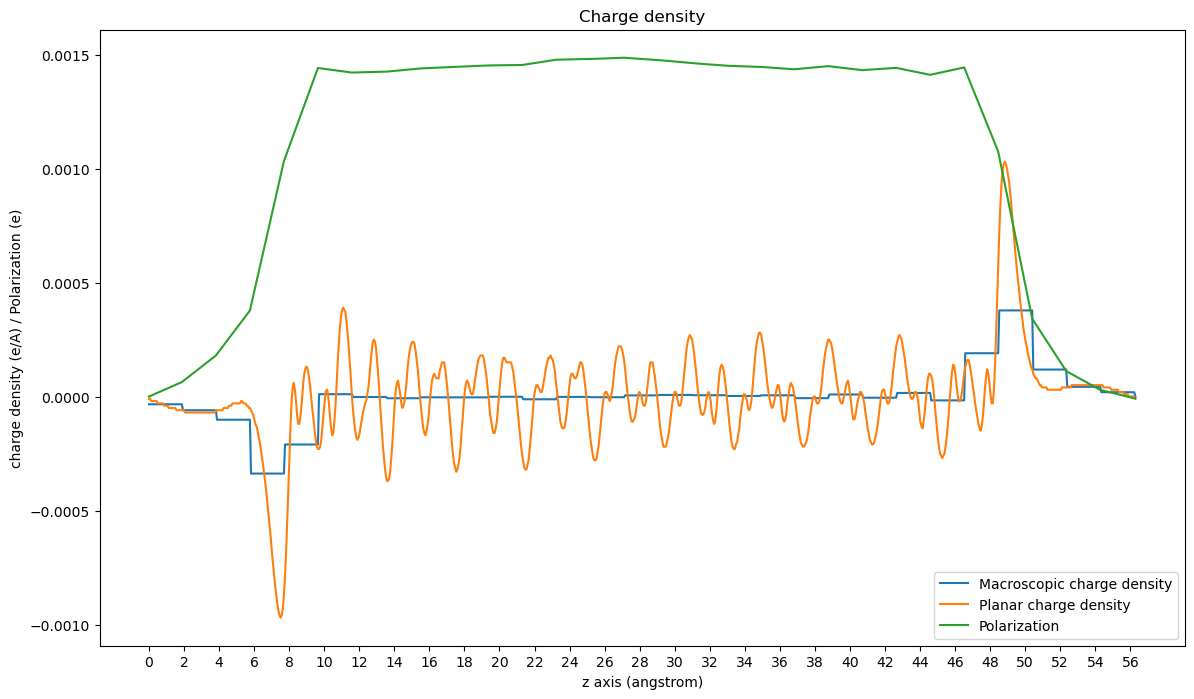

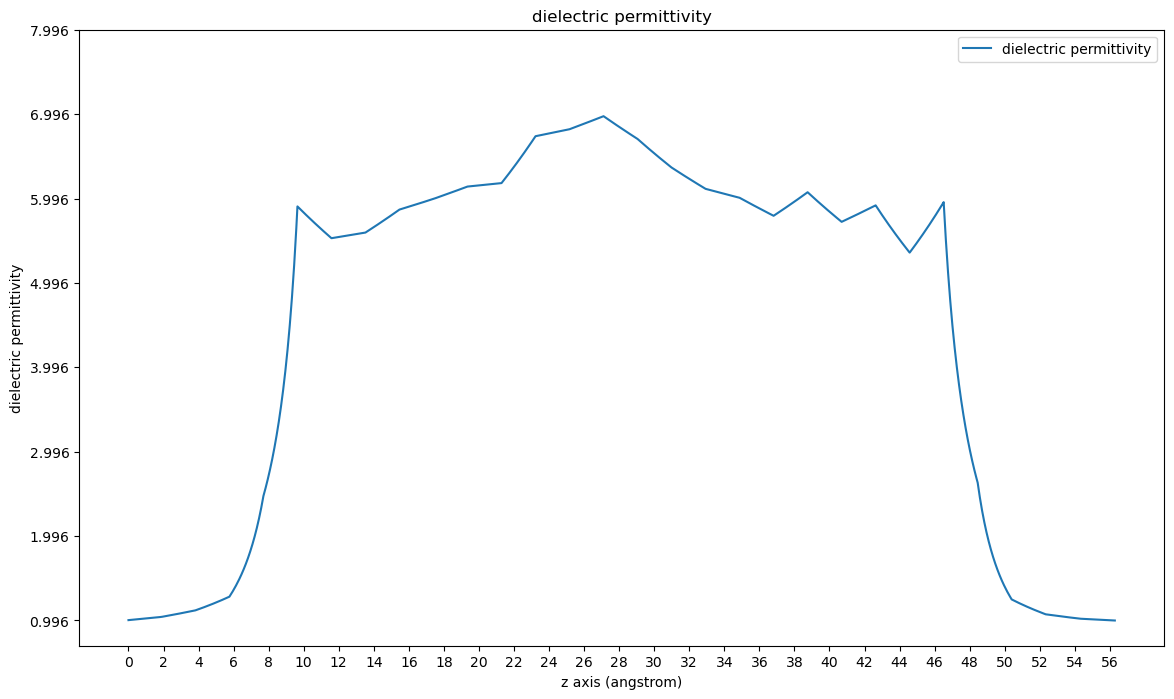

In [69]:
n = 31

def gaussian_filter(induced_charge):
     marc_charg = np.zeros((len(induced_charge), 2))
     marc_charg[:,0] = induced_charge[:,0] 
     N = len(induced_charge)
     for i in range(0, (N//n)):
          avg = np.sum(induced_charge[i*n:(i+1)*n, 1])/n
          marc_charg[i*n:(i+1)*n, 1] = avg # average of the charge density in the range of n.
          
     marc_charg[(N//n)*n:,1] = np.sum(marc_charg[(N//n):,1])/len(marc_charg[(N//n):,1]) # define for the last part of the array     
     return marc_charg

gau_marc_chg = gaussian_filter(induced_charge)



gau_induced_polarization = polarization(gau_marc_chg)
gau_induced_permittivity = permittivity(gau_induced_polarization)


print("The length for averaging is", n * (gau_marc_chg[1,0]-gau_marc_chg[0,0]), "angstrom")
# Plotting using Matplotlib.
plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], gau_marc_chg[:, 1], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], gau_induced_polarization, label='Polarization')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('charge density (e/A) / Polarization (e)')
plt.title('Charge density')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 1], label='Macroscopic charge density')
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], gau_induced_permittivity, label='dielectric permittivity')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.yticks(np.arange(min(induced_permittivity), max(induced_permittivity)+1, 1.0))  # Add yticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('dielectric permittivity')
plt.title('dielectric permittivity')
plt.legend()
plt.show()


The length for averaging is 1.9406 angstrom


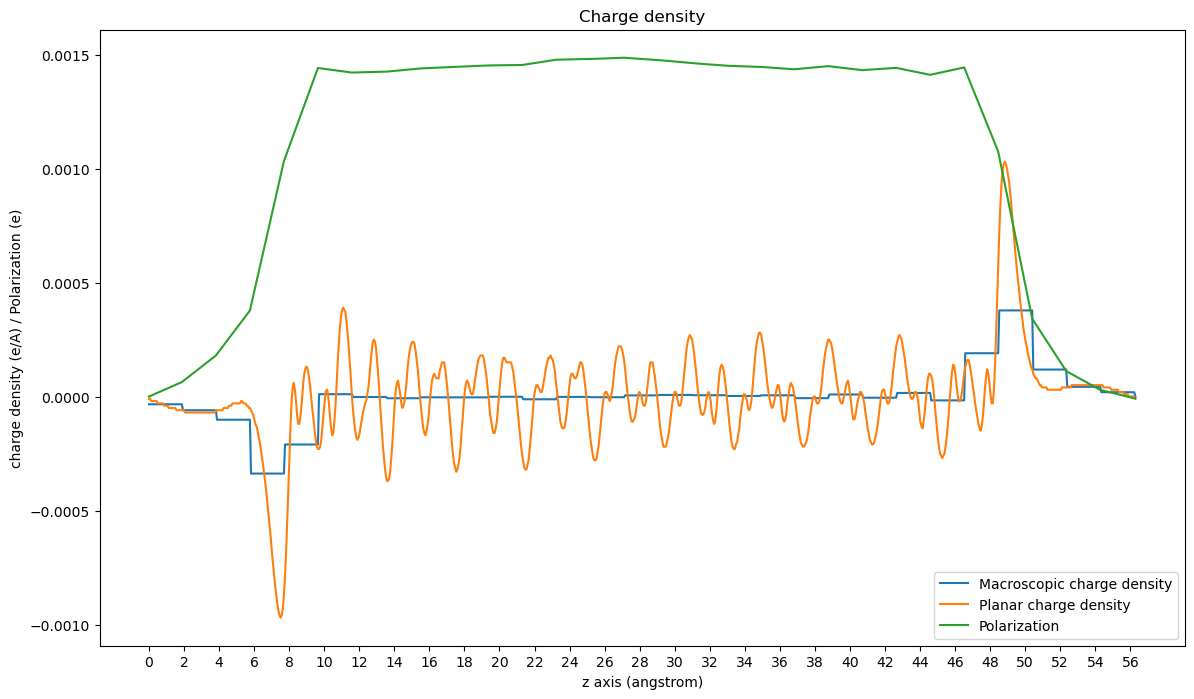

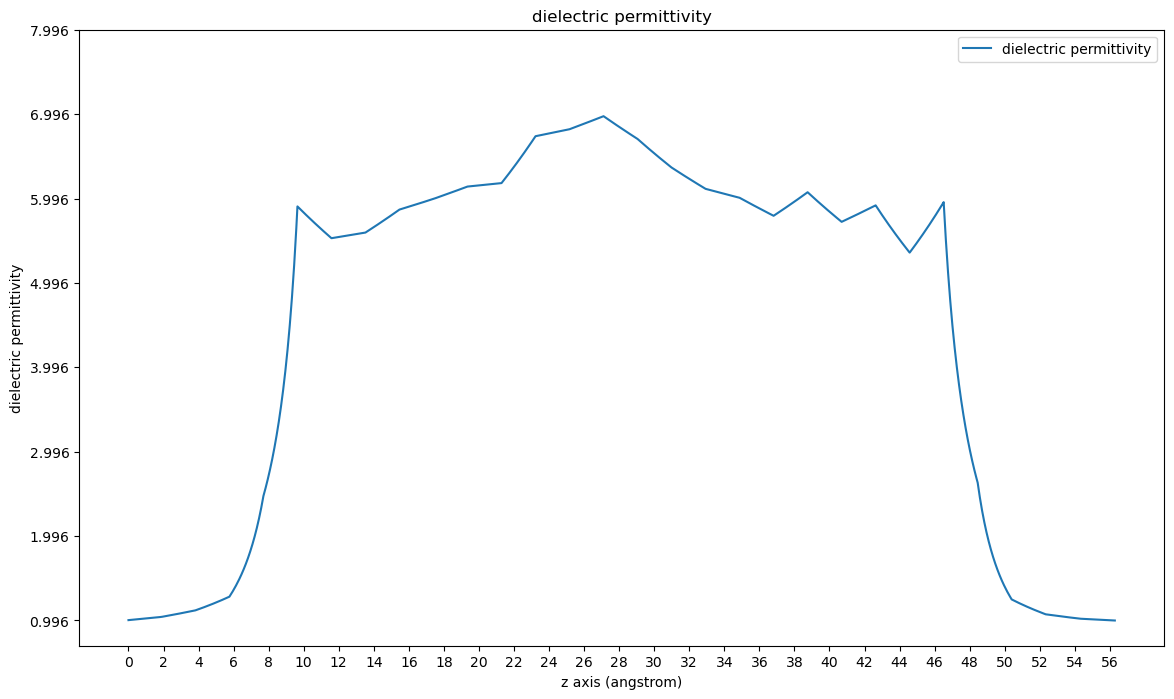

In [132]:
n = 31
m = 0  # overlaped data points.
l = 0  # offset of the data points; where you are gonna start to integrate.

def gaussian_filter(induced_charge):
     marc_charg = np.zeros((len(induced_charge), 2))
     marc_charg[:,0] = induced_charge[:,0] 
     N = len(induced_charge)
     for i in range(0, (N//n)):
          avg = np.sum(induced_charge[i*n-m+l:(i+1)*n+m+l, 1])/(n+2*m)
          marc_charg[i*n:(i+1)*n, 1] = avg # average of the charge density in the range of n.
          
     marc_charg[(N//n)*n:,1] = np.sum(marc_charg[(N//n):,1])/len(marc_charg[(N//n):,1]) # define for the last part of the array     
     return marc_charg

gau_marc_chg = gaussian_filter(induced_charge)



gau_induced_polarization = polarization(gau_marc_chg)
gau_induced_permittivity = permittivity(gau_induced_polarization)


print("The length for averaging is", (n+2*m) * (gau_marc_chg[1,0]-gau_marc_chg[0,0]), "angstrom")
# Plotting using Matplotlib.
plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], gau_marc_chg[:, 1], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], gau_induced_polarization, label='Polarization')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('charge density (e/A) / Polarization (e)')
plt.title('Charge density')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 1], label='Macroscopic charge density')
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], gau_induced_permittivity, label='dielectric permittivity')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.yticks(np.arange(min(induced_permittivity), max(induced_permittivity)+1, 1.0))  # Add yticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('dielectric permittivity')
plt.title('dielectric permittivity')
plt.legend()
plt.show()


The length for averaging is 2.0032 angstrom


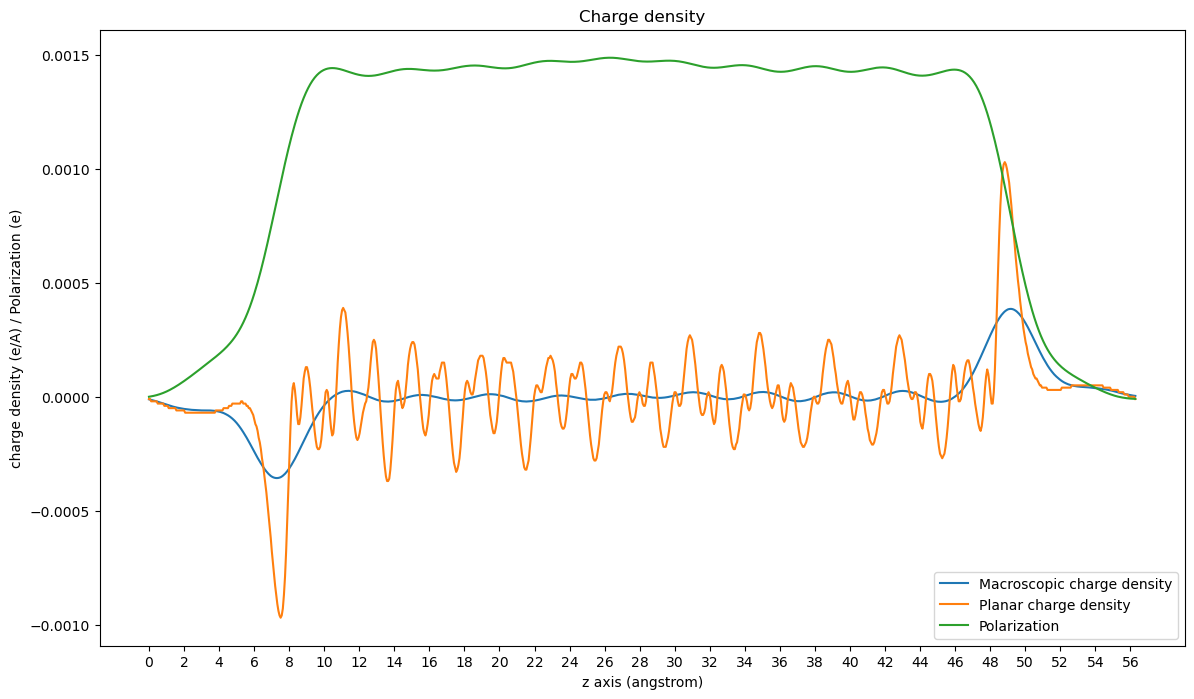

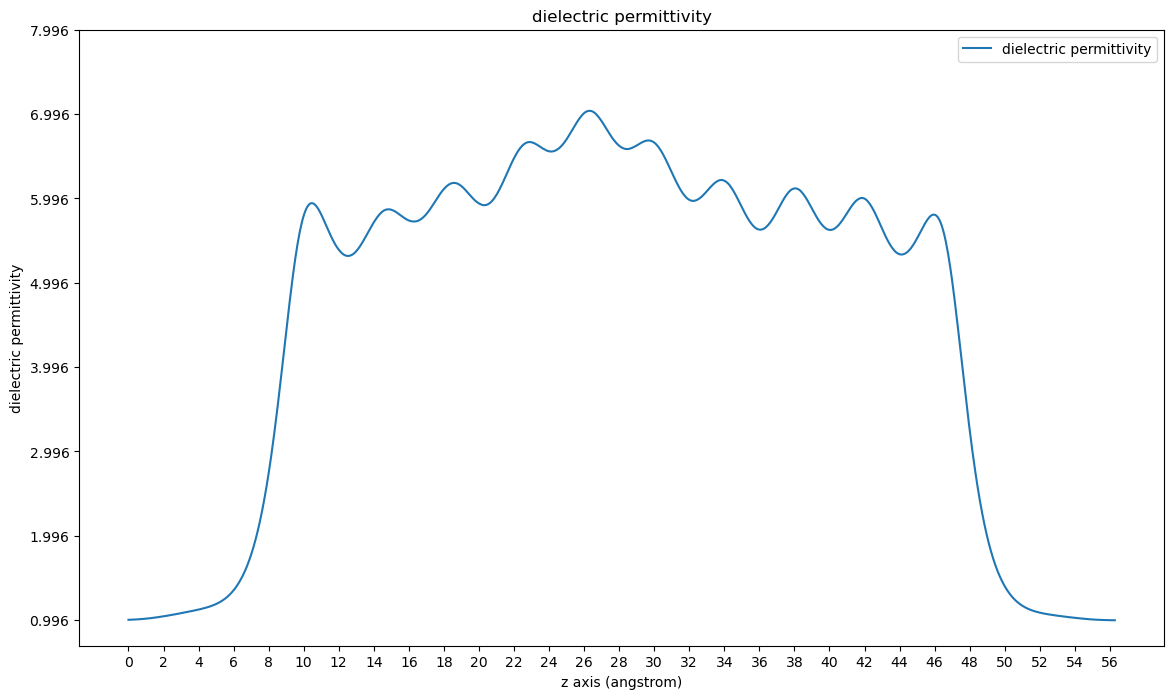

In [151]:
n = 32
m = 0  # overlaped data points.
l = 15  # offset of the data points; where you are gonna start to integrate.

# def gaussian_filter(induced_charge):
#      marc_charg = np.zeros((len(induced_charge), 2))
#      marc_charg[:,0] = induced_charge[:,0] 
#      N = len(induced_charge)
#      marc_charg[:,1] = (np.sum(induced_charge[-16:,1]) + np.sum(induced_charge[:16,1]))/32
#      return marc_charg

def gaussian_filter(induced_charge):
    marc_charg = np.zeros((len(induced_charge), 2))
    marc_charg[:,0] = induced_charge[:,0]

    # Create a window of size 32
    window = np.ones(n) / n

    # Compute the average of every 32 elements
    marc_charg[:,1] = np.convolve(induced_charge[:,1], window, 'same')
    return marc_charg

gau_marc_chg = gaussian_filter(induced_charge)
gau_induced_polarization = polarization(gau_marc_chg)
gau_induced_permittivity = permittivity(gau_induced_polarization)


print("The length for averaging is", (n+2*m) * (gau_marc_chg[1,0]-gau_marc_chg[0,0]), "angstrom")
# Plotting using Matplotlib.
plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], gau_marc_chg[:, 1], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], gau_induced_polarization, label='Polarization')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('charge density (e/A) / Polarization (e)')
plt.title('Charge density')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 1], label='Macroscopic charge density')
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], gau_induced_permittivity, label='dielectric permittivity')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.yticks(np.arange(min(induced_permittivity), max(induced_permittivity)+1, 1.0))  # Add yticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('dielectric permittivity')
plt.title('dielectric permittivity')
plt.legend()
plt.show()


In [149]:
from scipy.ndimage import gaussian_filter1d

def gaussian_filter(induced_charge, sigma):
    marc_charg = np.zeros((len(induced_charge), 2))
    marc_charg[:,0] = induced_charge[:,0]

    # Apply Gaussian filter
    marc_charg[:,1] = gaussian_filter1d(induced_charge[:,1], sigma)

    return marc_charg

The length for averaging is 1.9406 angstrom


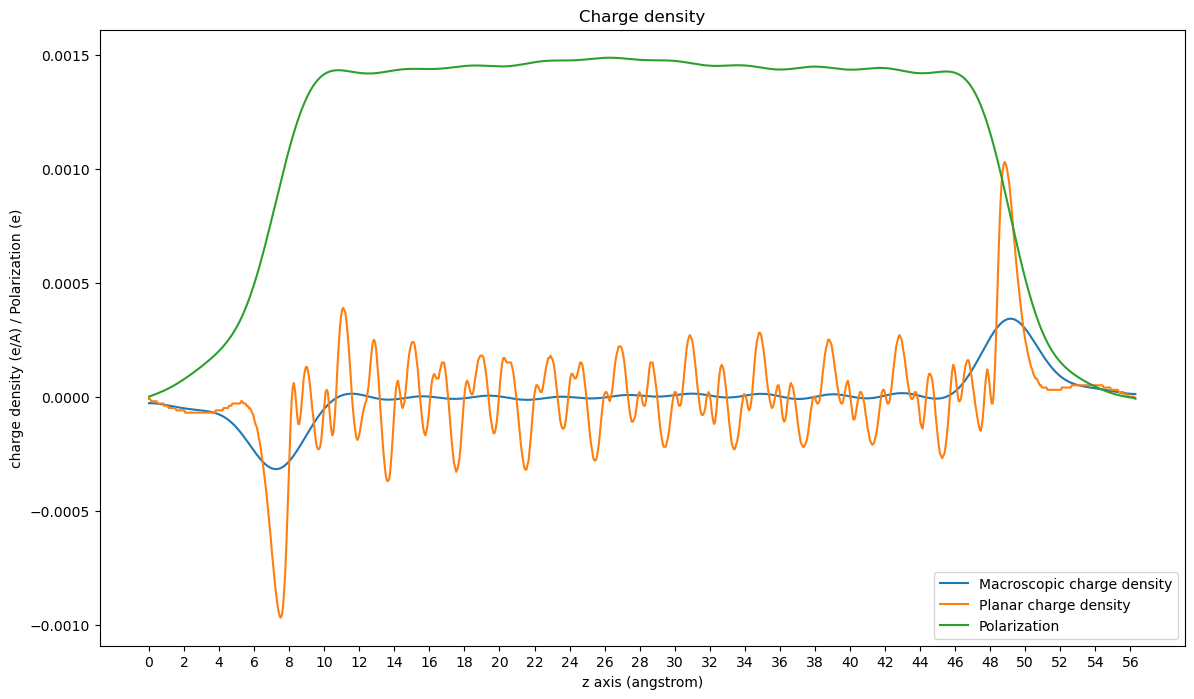

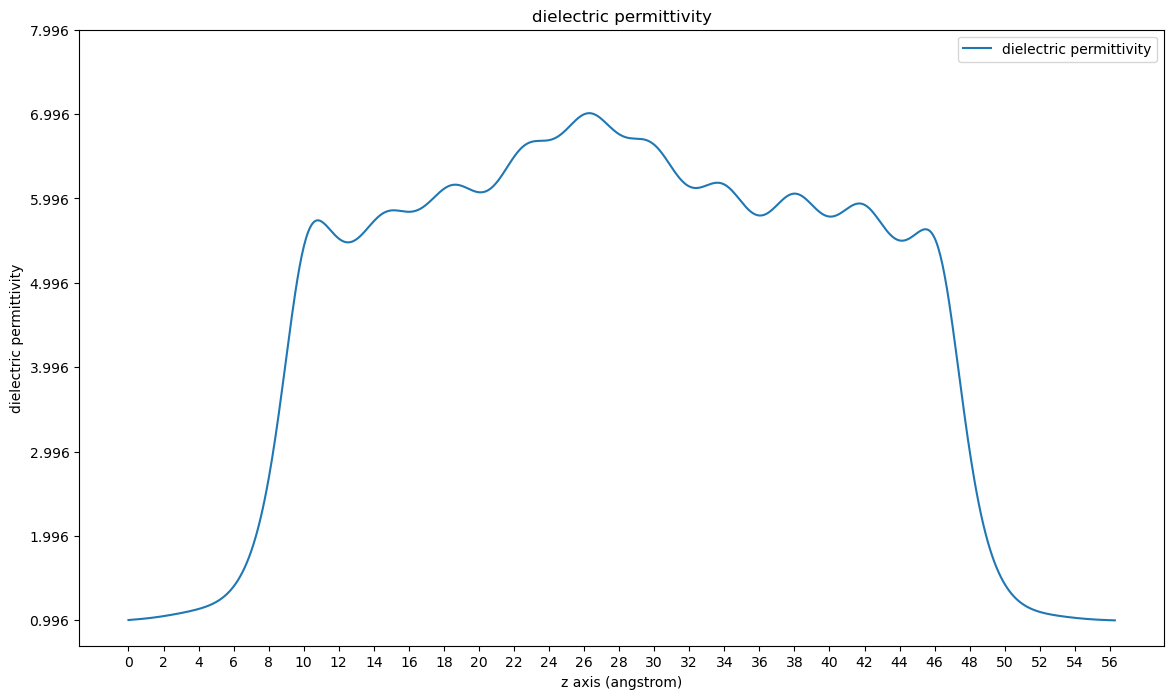

In [150]:
gau_marc_chg = gaussian_filter(induced_charge, sigma=15)
gau_induced_polarization = polarization(gau_marc_chg)
gau_induced_permittivity = permittivity(gau_induced_polarization)


print("The length for averaging is", (n+2*m) * (gau_marc_chg[1,0]-gau_marc_chg[0,0]), "angstrom")
# Plotting using Matplotlib.
plt.figure(figsize=(14, 8))
plt.plot(induced_charge[:, 0], gau_marc_chg[:, 1], label='Macroscopic charge density')
plt.plot(induced_charge[:, 0], induced_charge[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], gau_induced_polarization, label='Polarization')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('charge density (e/A) / Polarization (e)')
plt.title('Charge density')
plt.legend()
plt.show()

plt.figure(figsize=(14, 8))
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 1], label='Macroscopic charge density')
# plt.plot(data_Eplus_minus_Eminus[:, 0], data_Eplus_minus_Eminus[:, 2], label='Planar charge density')
plt.plot(induced_charge[:, 0], gau_induced_permittivity, label='dielectric permittivity')
plt.xticks(np.arange(min(induced_charge[:, 0]), max(induced_charge[:, 0])+1, 2.0))  # Add xticks
plt.yticks(np.arange(min(induced_permittivity), max(induced_permittivity)+1, 1.0))  # Add yticks
plt.xlabel('z axis (angstrom)')
plt.ylabel('dielectric permittivity')
plt.title('dielectric permittivity')
plt.legend()
plt.show()